<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumApplicationAlgorithm_VQA_VQE(PySCFOnly)_mkbahk_20251212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 10.7 MB/s eta 0:00:00


In [13]:
import numpy as np
from pyscf import gto, scf, mp, ci, cc

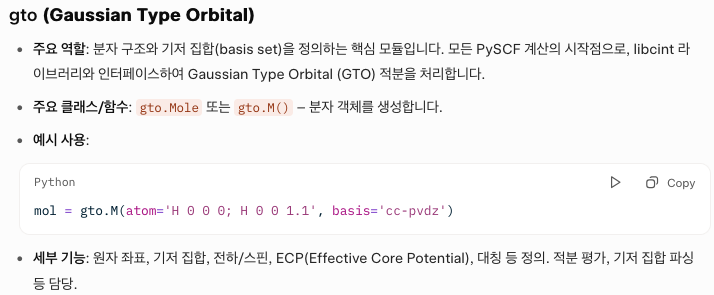

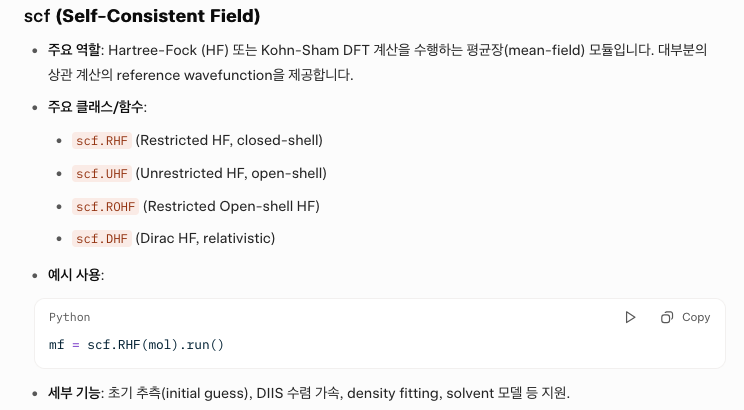

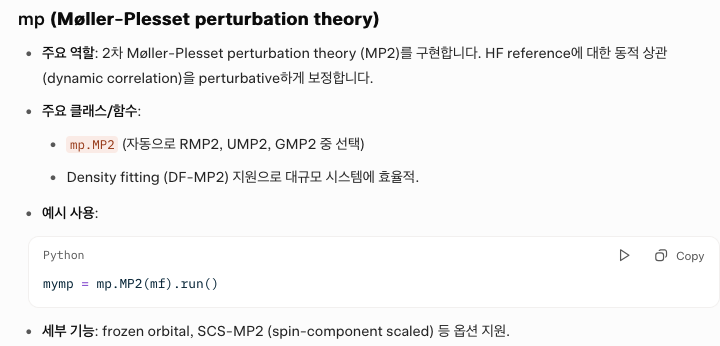

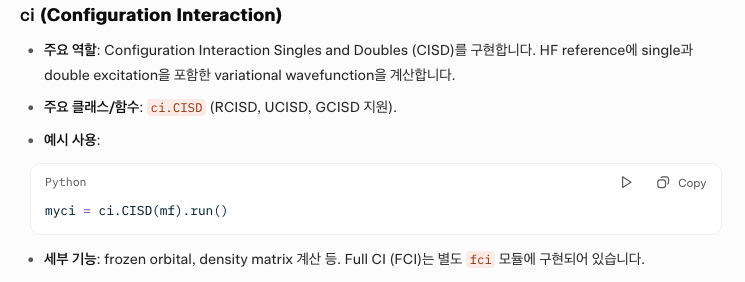

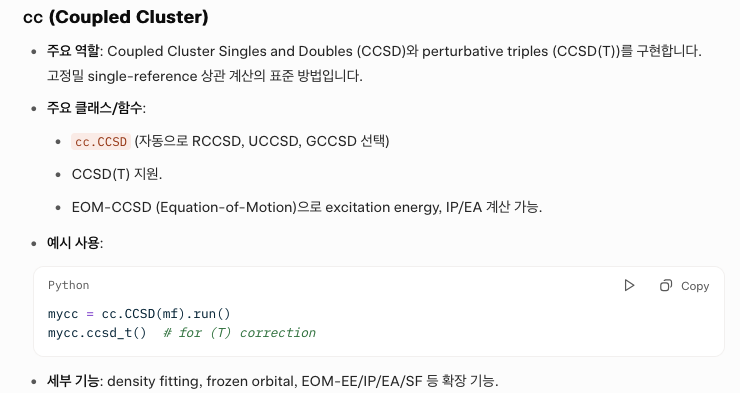

In [14]:
# 물분자 구조 정의 (단위: Angstrom)
mol = gto.Mole()

#물분자 구조
mol.atom = '''
    O  0.0000  0.0000  0.1173
    H  0.0000  0.7572 -0.4692
    H  0.0000 -0.7572 -0.4692
'''

#에탄올 (Ethanol, C₂H₅OH) – 탄소(C) + 수소(H) + 산소(O)
#3-종류 원소 (staggered conformation).

#mol.atom = """
#C   0.000000   0.000000   0.739000
#C   0.000000   0.000000  -0.811000
#O   0.000000   1.395000   1.139000
#H   0.000000  -0.951000   1.309000
#H   0.000000   0.951000   1.309000
#H   0.823000   0.000000  -1.381000
#H  -0.823000   0.000000  -1.381000
#H   0.000000   0.000000  -1.381000
#H   0.000000   1.395000   2.139000
#"""


#mol.basis = '6-31g'
mol.basis = 'sto-3g'
mol.unit = 'angstrom'
mol.spin = 0 # 435개의 전자는 홀수이므로 spin=0(단일항)과 일치하지 않습니다. spin=1(이중항)으로 설정합니다.
mol.build()

print("=" * 60)
print("계산용 분자 바닥상태 에너지 계산")
print("=" * 60)
print(f"기저 함수: {mol.basis}")
print(f"전자 수: {mol.nelectron}")
print(f"원자 수: {mol.natm}")
print("=" * 60)


계산용 분자 바닥상태 에너지 계산
기저 함수: sto-3g
전자 수: 10
원자 수: 3


In [15]:
#mf = scf.RHF(mol).run()  # HF reference

# MP2
#mp.MP2(mf).run()

# CISD
#ci.CISD(mf).run()

# CCSD(T)
#mycc = cc.CCSD(mf).run()
#mycc.ccsd_t()

In [16]:
# 1. Hartree-Fock (HF) 계산
print("\n[1] Hartree-Fock (HF) 계산")
mf = scf.RHF(mol)
hf_energy = mf.kernel()
print(f"HF 에너지: {hf_energy:.10f} Hartree")


[1] Hartree-Fock (HF) 계산
converged SCF energy = -74.9630231384612
HF 에너지: -74.9630231385 Hartree


In [17]:
# 2. MP2 (Møller-Plesset 2차 섭동론) 계산
print("\n[2] MP2 계산")
mp2 = mp.MP2(mf)
mp2_energy = mp2.kernel()[0]
print(f"MP2 상관 에너지: {mp2_energy:.10f} Hartree")
print(f"MP2 총 에너지: {hf_energy + mp2_energy:.10f} Hartree")


[2] MP2 계산
E(RMP2) = -74.9985687717234  E_corr = -0.0355456332621222
E(SCS-RMP2) = -75.0039187118203  E_corr = -0.0408955733590758
MP2 상관 에너지: -0.0355456333 Hartree
MP2 총 에너지: -74.9985687717 Hartree


In [18]:
# 3. CCSD (Coupled Cluster Singles and Doubles) 계산
print("\n[3] CCSD 계산")
ccsd = cc.CCSD(mf)
ccsd_energy = ccsd.kernel()[0]
print(f"CCSD 상관 에너지: {ccsd_energy:.10f} Hartree")
print(f"CCSD 총 에너지: {hf_energy + ccsd_energy:.10f} Hartree")


[3] CCSD 계산
E(CCSD) = -75.0124617127727  E_corr = -0.04943857431146149
CCSD 상관 에너지: -0.0494385743 Hartree
CCSD 총 에너지: -75.0124617128 Hartree


In [19]:
# 4. CISD (Configuration Interaction Singles and Doubles) 계산
print("\n[4] CISD 계산")
cisd = ci.CISD(mf)
cisd_energy = cisd.kernel()[0]
print(f"CISD 상관 에너지: {cisd_energy:.10f} Hartree")
print(f"CISD 총 에너지: {hf_energy + cisd_energy:.10f} Hartree")


[4] CISD 계산
E(RCISD) = -75.0118731693473  E_corr = -0.04885003088605315
CISD 상관 에너지: -0.0488500309 Hartree
CISD 총 에너지: -75.0118731693 Hartree


In [20]:
# Numpy를 이용한 에너지 비교 및 분석
print("\n" + "=" * 60)
print("에너지 비교 및 분석 (Numpy 사용)")
print("=" * 60)

# 에너지 값을 배열로 저장
methods = np.array(['HF', 'MP2', 'CCSD', 'CISD'])
energies = np.array([
    hf_energy,
    hf_energy + mp2_energy,
    hf_energy + ccsd_energy,
    hf_energy + cisd_energy
])

# HF 에너지를 기준으로 한 상대 에너지 (kcal/mol)
hartree_to_kcal = 627.509474  # 변환 계수
relative_energies = (energies - energies[0]) * hartree_to_kcal

print("\n총 에너지 비교:")
for i, method in enumerate(methods):
    print(f"{method:6s}: {energies[i]:15.10f} Hartree")
###for

print("\n상대 에너지 (HF 기준, kcal/mol):")
for i, method in enumerate(methods):
    print(f"{method:6s}: {relative_energies[i]:10.4f} kcal/mol")
###for



에너지 비교 및 분석 (Numpy 사용)

총 에너지 비교:
HF    :  -74.9630231385 Hartree
MP2   :  -74.9985687717 Hartree
CCSD  :  -75.0124617128 Hartree
CISD  :  -75.0118731693 Hartree

상대 에너지 (HF 기준, kcal/mol):
HF    :     0.0000 kcal/mol
MP2   :   -22.3052 kcal/mol
CCSD  :   -31.0232 kcal/mol
CISD  :   -30.6539 kcal/mol


In [21]:
# 통계 분석
print("\n통계 분석 (Numpy):")
print(f"평균 에너지: {np.mean(energies):.10f} Hartree")
print(f"표준편차: {np.std(energies):.10f} Hartree")
print(f"최소 에너지: {np.min(energies):.10f} Hartree ({methods[np.argmin(energies)]})")
print(f"최대 에너지: {np.max(energies):.10f} Hartree ({methods[np.argmax(energies)]})")


통계 분석 (Numpy):
평균 에너지: -74.9964816981 Hartree
표준편차: 0.0201003069 Hartree
최소 에너지: -75.0124617128 Hartree (CCSD)
최대 에너지: -74.9630231385 Hartree (HF)


In [22]:
# 상관 에너지 비교
correlation_energies = np.array([0, mp2_energy, ccsd_energy, cisd_energy])
print("\n상관 에너지 회복률 (MP2 대비):")
for i in range(1, len(methods)):
    if i == 1:
        print(f"{methods[i]:6s}: 100.00% (기준)")
    else:
        recovery = (correlation_energies[i] / mp2_energy) * 100
        print(f"{methods[i]:6s}: {recovery:6.2f}%")
    ###if
###for


상관 에너지 회복률 (MP2 대비):
MP2   : 100.00% (기준)
CCSD  : 139.08%
CISD  : 137.43%


In [23]:
# 에너지 차이 행렬 (kcal/mol)
print("\n에너지 차이 행렬 (kcal/mol):")
print("       ", "".join([f"{m:>10s}" for m in methods]))
energy_diff_matrix = np.zeros((len(energies), len(energies)))
for i in range(len(energies)):
    diff_str = f"{methods[i]:6s} "
    for j in range(len(energies)):
        energy_diff_matrix[i, j] = (energies[i] - energies[j]) * hartree_to_kcal
        diff_str += f"{energy_diff_matrix[i, j]:10.4f}"
    ###for
    print(diff_str)
###for

print("\n" + "=" * 60)
print("계산 완료!")
print("=" * 60)


에너지 차이 행렬 (kcal/mol):
                HF       MP2      CCSD      CISD
HF         0.0000   22.3052   31.0232   30.6539
MP2      -22.3052    0.0000    8.7180    8.3486
CCSD     -31.0232   -8.7180    0.0000   -0.3693
CISD     -30.6539   -8.3486    0.3693    0.0000

계산 완료!
